# La tragédie du titanic
![](https://www.guide-irlande.com/wp-content/uploads/2020/02/titanic-1024x500.jpg)

### Objectif
**prédire les survivants du Titanic**
### Planification
* Définir le problème
* Collecte des données
* Analyse exploratoire des données (EDA)
* « Feature engineering »
* Modélisation
* Test

## 1. Définition du problème
Prédire les survivants du Titanic

## 2. collecte des données
Nous avons besoin de deux fichiers CSV -> train.csv et test.csv


In [1]:
import pandas as pd

# Nous allons lire les données
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 3. Analyse exploratoire des données (EDA)
Notre objectif est de mieux comprendre les jeux de données

In [2]:
# Imprimer les 20 premières observations du jeux de données pour Train
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Dictionnaire de données
* Survived : 0 = Oui, 1 = Non
* Pclass : 1 = première classe, 2 = deuxième classe, 3 = troisième classe
* SibSp : le nombre de frères, soeurs et conjointe à bord
* Parch : le nombre de parents et d'enfants à bord
* Ticket : le numéro de billet
* Cabin : le numéro de cabine
* Embarked : le port d'embarquement C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
# Nombre de lignes et de colonnes pour le jeux de données Train
train.shape

(891, 12)

In [4]:
# Nombre de lignes et de colonnes pour le jeux de données Test
test.shape

(418, 11)

In [5]:
# Informtions de chaque colonne (Feature) pour Train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Informtions de chaque colonne (Feature) pour Test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Notes
* On peut constater que la colonne **Age** comporte de nombreuses valeurs manquantes (NaN)
* On peut également constater que la colonne **Cabin** comporte de nombreuses valeurs manquantes (NaN)

### Les valeurs manquants (NaN)

In [7]:
# Les valeurs manquants pour Train
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Les valeurs manquants pour Test
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# Modules pour la visualisation des données
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Définir Seaborn par défaut pour les visualisations
sns.set()

### Barchart
Nous allons utiliser un « Barchart » pour les colonnes (features) **catégorielles** :
* Sex (Homme ou Femme)
* Pclass (Première, Deuxième ou Troisième)
* SibSp (# de frères, soeurs et conjointe)
* Parch (# de parents ou enfants)
* Embarked (Cherbourg, Queenstown, Southampton)

In [10]:
# Définir une fonction pour créer un Barchart
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['A survécu', 'Est mort']
    df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

### Sex
Note : les femmes avaient plus de chances de survivre

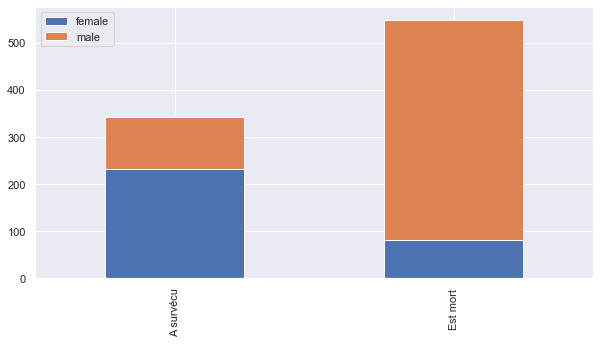

In [12]:
bar_chart('Sex')

### Première classe, deuxième classe et troisième classe
Note : les passagers de 1ère classe avaient plus de chances de survivre

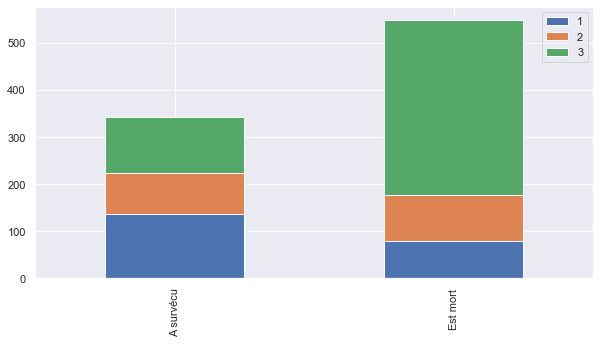

In [13]:
bar_chart('Pclass')

### Nombre de frères, soeurs et conjointe
Note : une personne qui est montée à bord sans ses frères, sœurs ou conjointe avait plus de probabilité de mourir à bord

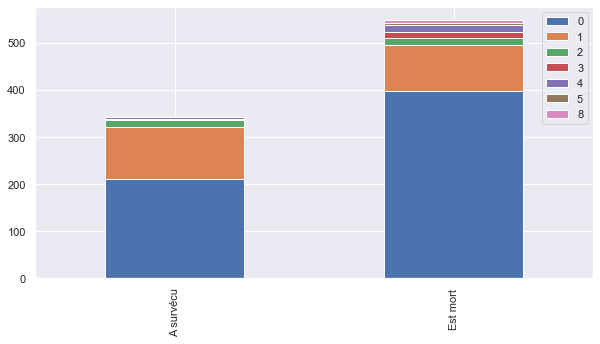

In [14]:
bar_chart('SibSp')

### Nombre de parents ou enfants
Note : une personne qui est montée à bord sans parents ou enfants avait plus de probabilité de mourir à bord

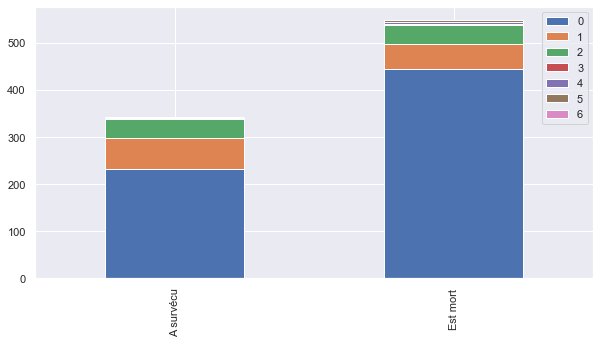

In [15]:
bar_chart('Parch')

### Port d'embarquement C = Cherbourg, Q = Queenstown, S = Southampton
Note : une personne qui est montée à bord à partir de C(Cherbourg) avait légèrement plus de chances de survivre.

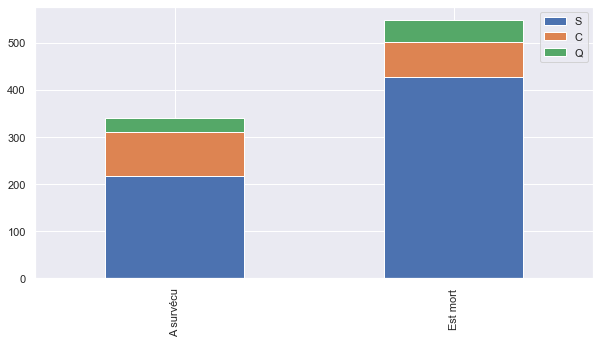

In [16]:
bar_chart('Embarked')

## 4. « Feature Engineering »

In [17]:
# La première chose à faire est de combiner les jeux de données Train et Test
train_test_data = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Nom et prénom
Note : nous pouvons identifier que chaque personne à bord a des titres différents (Mr., Miss., Mrs., etc.)

In [18]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
    
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Ms            1
Countess      1
Don           1
Capt          1
Mme           1
Sir           1
Lady          1
Name: Title, dtype: int64

##### Map du Titre
* **Mr.** : 0
* **Miss.** : 1
* **Mrs.** : 2
* **Others** : 3

In [19]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Note : nous n'avons plus besoin de la colonne **Name**, donc nous allons la supprimer

In [21]:
# Supprimer la colonne (feature) Name
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


### Sex
Note : 
* Homme = 0
* Femme = 1

In [23]:
# Changer male = 0 et female = 1
sex_mapping = {'male': 0, 'female': 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
    
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


### Âge
Note : de nombreuses valeurs de la colonne **Age** sont manquantes. Nous allons utiliser l'âge médian de la colonne **Title** pour les âges manquants

In [24]:
# remplir les âges manquants avec l'âge médian pour chaque titre (Mr., Mme., Mlle. et Autres)
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace = True)

In [25]:
# Vérifier Train
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [26]:
# Vérifier Test
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

Note : nous allons essayer de catégoriser les tranches d'âge

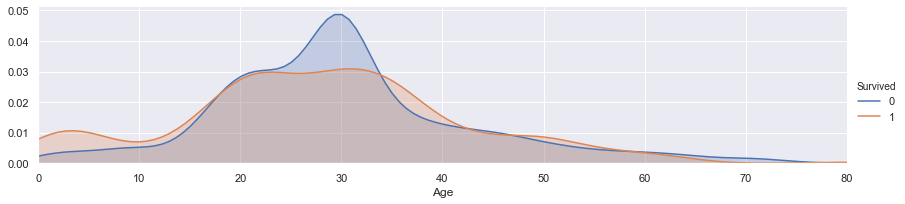

In [27]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()

plt.show()

(0, 20)

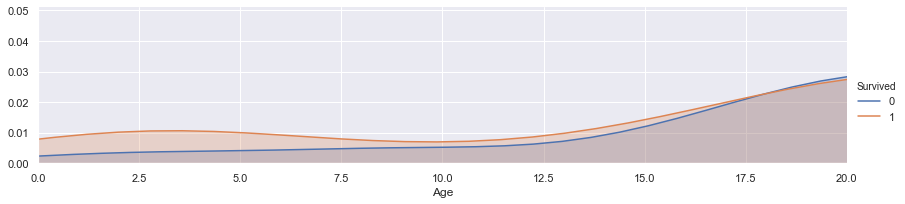

In [28]:
# Zoom sur les 0 à 20 ans
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20, 30)

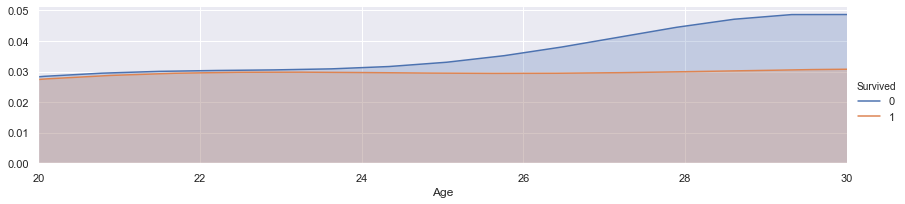

In [29]:
# Zoom sur les 20 ans
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30, 40)

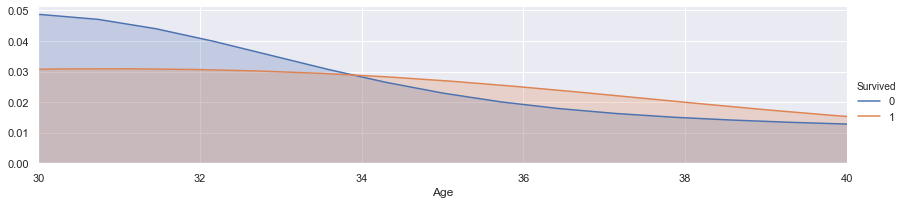

In [30]:
# Zoom sur les 30 ans
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

In [ ]:
# Zoom sur 40 à 60 ans
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

In [ ]:
# Zoom à partir de 60 ans
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

##### Nous allons faire avec les tranches d'âge quelque chose qui s'appelle Binning
* Enfant : 0 -- moins de 16 ans
* Jeune : 1 -- entre 16 et 26 ans
* Adulte : 2 -- entre 26 et 36 ans
* Adulte majeur : 3 -- entre 36 et 62 ans
* Senior : 4 -- plus de 62 ans

In [31]:
# Créer le Binning pour la colonne Âge
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


### Port d'embarquement 
* C = Cherbourg, Q = Queenstown, S = Southampton
* Note : nous allons commencer par une stratégie pour remplir les valeurs manquants

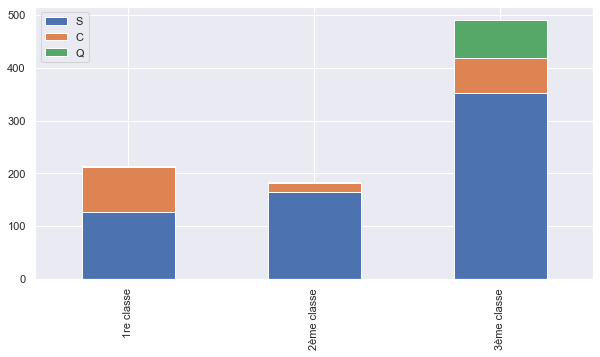

In [33]:
# Créer un Bar Chart pour idéntifier le port que les passagers ont le plus emprunté
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1re classe','2ème classe', '3ème classe']
df.plot(kind='bar',stacked=True, figsize=(10,5))



Note : plus de 50% (1er, 2ème et 3ème classe) des passagers ont pris le port de Southampton (S)

In [34]:
# Remplir les valeurs manquants pour la colonne Embark
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [35]:
# Vérification pour le jeu de données Train
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [36]:
# Vérification pour le jeu de données Train
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

##### Mapping pour la colonne Embarked
* **Southampton (S)** = 0
* **Cherbourg (C)** = 1
* **Queenstown (Q)** = 2

In [37]:
# Mapping pour la colonne Embarked
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

### Tarif (Fare)

* Note : nous allons remplir les tarifs (la colonne Fare) manquants avec le tarif médian pour chaque classe.

In [38]:
# Remplir les valeurs manquants pour la colonne (Feature) Fare
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [39]:
# Vérifier pour le jeu de données Train
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [40]:
# Vérifier pour le jeu de données Test
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

##### Catégorisation des tarifs
Note : nous allons suivre la même procédure que pour la colonne **Age**

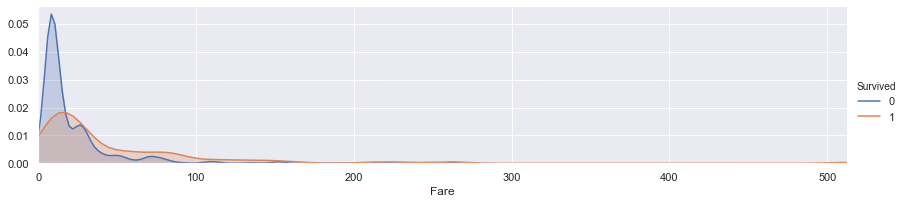

In [41]:
# Idéntifier les tarifs
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

(0, 20)

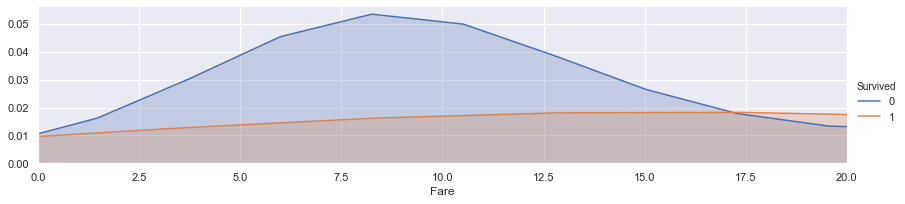

In [42]:
# Zoom sur les tarifs 0 à 20
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [ ]:
# Zoom sur les tarfis 0 à 30
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

##### Catégorisation de la colonne Fare (Tarif)
Nous allons créer 4 catégories :
* 0 = moins de 17
* 1 = entre 17 et 30
* 2 = entre 30 et 100
* 3 = plus de 100

In [45]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [46]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,0.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,0.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


### Cabin (la cabine)
Note : nous pouvons idéntifier que la première lettre de la cabine (A, B, C, etc.) sépare les espaces

In [47]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
C22 C26        3
              ..
C99            1
C86            1
C87            1
E68            1
A23            1
Name: Cabin, Length: 147, dtype: int64

In [48]:
# Extrait de la première lettre de chaque cabine
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

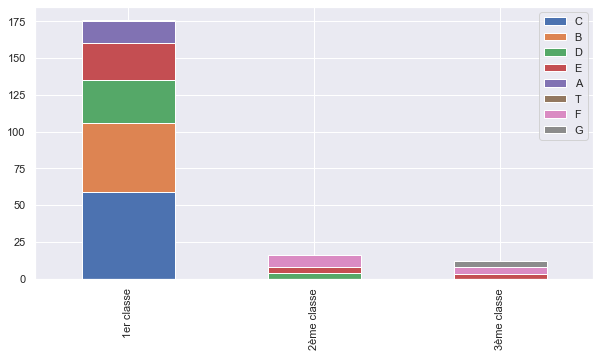

In [49]:
# Visualiser les différentes cabines par classe
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1er classe','2ème classe', '3ème classe']
df.plot(kind='bar',stacked=True, figsize=(10,5))

##### Mapping des cabines
Nous pouvons idéntifier 8 cabines :
* A : 0
* B : 0.4
* C : 0.8
* D : 1.2
* E : 1.6
* F : 2
* G : 2.4
* T : 2.8

In [50]:
# Mapping des cabines
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [51]:
# Remplis les valeurs manquants pour la colonne Cabin (Cabine)
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [52]:
# Vérification pour le jeu de données Train
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [53]:
# Vérification pour le jeu de données Test
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

### Taille de la famille
Note : Nous allons faire la somme de tous les membres de la famille plutôt que d'avoir les frères, les soeurs, les conjointes séparés des parents et des enfants.

In [54]:
# Additionner tous les membres de la famille aux jeux de données Train et Test. 1 = seul
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

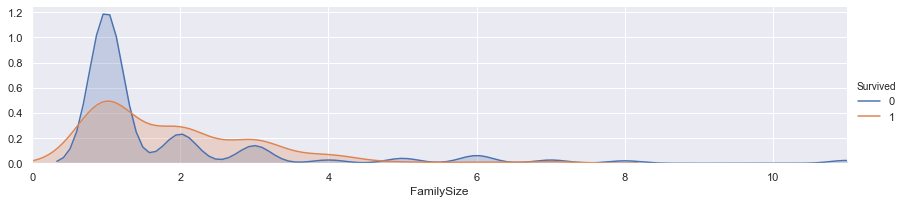

In [55]:
# Visualiser les personnes avec différentes quantités de membres de la famille à bord qui ont survécu et qui n'ont pas survécu
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

##### Mapping pour la quantité de membres de la famille
Nous pouvons idéntifier un mapping qui va de 1 à 11 membres :
* 1 : 0
* 2 : 0.4
* 3 : 0.8
* 4 : 1.2
* 5 : 1.6
* 6 : 2
* 7 : 2.4
* 8 : 2.8
* 9 : 3.2
* 10 : 3.6
* 11 : 4

In [56]:
# Mapping des memebre de la famille pour chaque passager
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,0.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,0.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


## Colonnes ou Features à supprimer
Nous n'avons pas besoin des colonnes (ou Features) suivantes :
* Ticket
* SibSp (nous avons maintenant membres de la famille)
* Parch (nous avons maintenant membres de la famille)
* Pour le jeu de données Train -- PassengerId (cette colonne n'apporte rien à l'entraînement)

In [58]:
# Supprimer les colonnes (Features) que nous n'allons pas utiliser pour l'entraînement ni pour le test
features_drop = ['Ticket', 'SibSp', 'Parch']
# Pour le jeu de données Train
train = train.drop(features_drop, axis=1)
# Pour le jeu de données Test
test = test.drop(features_drop, axis=1)
# Supprimer PassengerId pour le jeu de données Train
train = train.drop(['PassengerId'], axis=1)

##### Préparer les jeux de données pour l'entraînement : Train et Target
* Nous n'avons pas besoin de la colonne (Feature) **Survived** pour le jeu de données Train
* Nous devons créer une seule colonne séparé la cible (Target) : **Survived**

In [59]:
# Supprimer la colonne Survived du jeu de données Train
train_data = train.drop('Survived', axis=1)
# Créer une colonne séparée avec Survived
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [60]:
# Jeu de données que nous allons utiliser pour l'entraînement (sans la colonne Survived)
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,0.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,0.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


## 5. Modélisation

In [62]:
# Importer les modules de Classification (Machine Learning)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

### Cross Validation (K-fold)
Note : il s'agit de notre méthode de validation pour chaque modèle

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### kNN
Note : le premier algorithme de classification s'appelle Neighbors Classifier

In [64]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.79775281 0.82022472 0.83146067 0.83146067 0.84269663
 0.79775281 0.80898876 0.82022472 0.84269663]


In [65]:
# Score pour kNN
round(np.mean(score)*100, 2)

82.15

### Decision Tree

In [66]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.73333333 0.78651685 0.79775281 0.78651685 0.87640449 0.78651685
 0.80898876 0.82022472 0.76404494 0.7752809 ]


In [67]:
# Score pour Decision Tree
round(np.mean(score)*100, 2)

79.36

### Random Forest
Note : plusieurs arbres de décision

In [68]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.79775281 0.7752809  0.7752809  0.85393258 0.79775281
 0.79775281 0.80898876 0.7752809  0.76404494]


In [69]:
# Score pour Forest Score
round(np.mean(score)*100, 2)

79.24

### Naive Bayes
Note : plus spécifiquement Gaussian Naive Bayes

In [70]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.73033708 0.75280899 0.75280899 0.74157303 0.80898876
 0.76404494 0.79775281 0.83146067 0.84269663]


In [71]:
# Score pour Gaussian Naive Bayes
round(np.mean(score)*100, 2)

78.56

### Support Vector Machine (SVM)
Note : plus spécifiquement l'implementation SVC

In [72]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.84444444 0.7752809  0.82022472 0.82022472 0.85393258 0.79775281
 0.83146067 0.86516854 0.83146067 0.85393258]


In [73]:
# Score pour SVM
round(np.mean(score)*100,2)

82.94

### Meilleur Score
L'algorithm Support Vector Machine (SVM) nous donne le meilleur score (83.5), nous allons l'utiliser pour le Test

## 6. Test

### Fit Data into the algorithm
Note : nous allons utiliser l'algorithm SVM dans notre modèle.
* La première étape est de Fit le modèle avec les données d'entraînement (train_data) et le target (Survived)
* La deuxième étape est de tester le modèle avec des données que l'algorithme ne connaît pas (la prédiction)

In [74]:
# Fit le modèle en utilisant SVM
clf = SVC()
clf.fit(train_data, target)

# Tester le modèle avec les données de Test, pour le test, nous allons effacer la colonne PassengerId du jeu de données Test
test_data = test.drop("PassengerId", axis=1).copy()
# Réaliser la prédiction pour le jeu de données Test
prediction = clf.predict(test_data)

In [75]:
# Préparer le document avec les prédictions -- Kaggle a besoin de la colonne PassengerId
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [76]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
